<a href="https://colab.research.google.com/github/DrKamaleshR/Supervised-ML-regression/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

For any business growth it is very important to know it's future business and take steps accordingly to improve or grow their business.

Here we have Rossmann various stores and we are to predict sales for different stores.

Let's start by exploring data set, which are the factors affecting Sales in this stores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [4]:
from catboost import CatBoostRegressor

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
ross_dfpath='/content/drive/My Drive/almabetter projects/SUPERVISED re/Rossmann Stores Data.csv'

In [7]:
rosstorepath='/content/drive/My Drive/almabetter projects/SUPERVISED re/store.csv'

In [8]:
ross_df=pd.read_csv(ross_dfpath)

In [9]:
store_df=pd.read_csv(rosstorepath)


# Exploratory Data Analysis



In [10]:
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
ross_df.shape

(1017209, 9)

In [12]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
store_df.shape

(1115, 10)

In [15]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
'''CHECKING FOR NaN values'''
ross_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

No NaN caluses are present in ross_df.csv

In [17]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Numerous Nan values are seen in - 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. However, 'CompetitionDistance 'has only 3 null values. Data cleaning is needed.


In [18]:
#creating copy
store_dfv2 = store_df.copy()

In [19]:
## Replacing Nan values with 0.
store_dfv2['CompetitionOpenSinceMonth'] = store_dfv2['CompetitionOpenSinceMonth'].fillna(0)
store_dfv2['CompetitionOpenSinceYear'] = store_dfv2['CompetitionOpenSinceYear'].fillna(0)
store_dfv2['Promo2SinceWeek'] = store_dfv2['Promo2SinceWeek'].fillna(0)
store_dfv2['Promo2SinceYear'] = store_dfv2['Promo2SinceYear'].fillna(0)
store_dfv2['PromoInterval'] = store_dfv2['PromoInterval'].fillna(0)

In [20]:
## code for replacing Nan values in CompetitionDistance with mode.
store_dfv2['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [21]:
store_dfv2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [22]:
ROSS = pd.merge(ross_df, store_dfv2, on='Store', how='left')
ROSS.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [23]:
ROSS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [24]:
#lets find out data range of the data
print(ROSS['Date'].min(),'- start')
print(ROSS['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


We have have  2 years 7 months data values recorded, about 31 months retail sales data in the datasheet.

In [ ]:
ROSS.head(1115)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5,2015-07-31,5723,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,5,2015-07-31,9626,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,5,2015-07-31,7289,720,1,1,0,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,5,2015-07-31,27508,3745,1,1,0,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
ROSS.tail(1114)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016095,1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1016096,2,2,2013-01-01,0,0,0,0,a,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1016097,3,2,2013-01-01,0,0,0,0,a,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1016098,4,2,2013-01-01,0,0,0,0,a,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
1016099,5,2,2013-01-01,0,0,0,0,a,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


Store_df2 and Ross_df is successfully merged.

Sales is key variable, lets check if it has negative values or 0.

In [51]:
ROSS[ROSS['Sales'] <= 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
291,292,5,2015-07-31,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
875,876,5,2015-07-31,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
1406,292,4,2015-07-30,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
1990,876,4,2015-07-30,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
2521,292,3,2015-07-29,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [52]:
# Checking if false sale values are present in closed stores
ROSS[(ROSS['Open'] == 1) & (ROSS['Sales'] == 0)]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
86825,971,5,2015-05-15,0,0,1,0,0,1,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
142278,674,4,2015-03-26,0,0,1,0,0,0,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
196938,699,4,2015-02-05,0,0,1,1,0,0,a,a,180.0,0.0,0.0,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
322053,708,3,2014-10-01,0,0,1,1,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
330176,357,1,2014-09-22,0,0,1,0,0,0,a,a,2060.0,10.0,2008.0,0,0.0,0.0,0
340348,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,0.0,0.0,0,0.0,0.0,0
340860,835,4,2014-09-11,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
341795,835,3,2014-09-10,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
346232,548,5,2014-09-05,0,0,1,1,0,1,d,c,3760.0,2.0,2009.0,0,0.0,0.0,0
346734,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"


We can see that all closed stores have 0 sales values.


In [25]:
ROSS['Date']=pd.to_datetime(ROSS['Date'])

In [26]:
ROSS['Date'].dtypes
ROSS['year']=ROSS['Date'].dt.year
ROSS['month']=ROSS['Date'].dt.month
ROSS['week']=ROSS['Date'].dt.week

In [27]:
# Lets remove the number of closed stores, as they serves minimal to no purpose. Lets also drop the column'open'
ROSS2=ROSS[(ROSS['Open']==1)]
ROSS2.drop(['Open'],axis = 1, inplace=True)

In [28]:
ROSS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  float64

In [57]:
ROSS2.shape

(844392, 20)

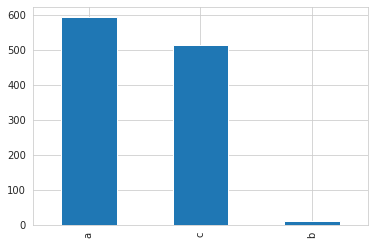

In [58]:
#categorical data visualisation
store_df['Assortment'].value_counts().plot(kind='bar')

Assortment type 'a' has higher counts, followed by 'c'.

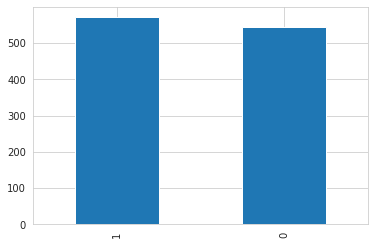

In [59]:
store_df['Promo2'].value_counts().plot(kind='bar')

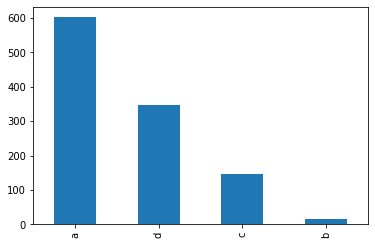

In [ ]:

store_df['StoreType'].value_counts().plot(kind='bar')

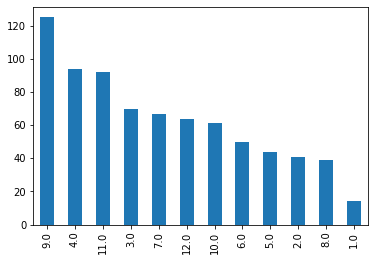

In [ ]:
store_df['CompetitionOpenSinceMonth'].value_counts().plot(kind='bar')

We can see most competions are open in the month of September followed by April and November.

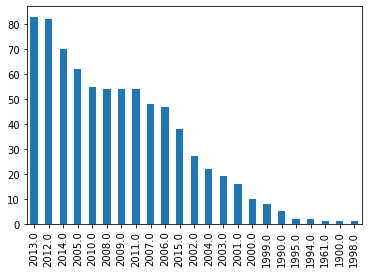

In [ ]:
store_df['CompetitionOpenSinceYear'].value_counts().plot(kind='bar')

We can see that after 2012 the number of competitors have increased drastically.

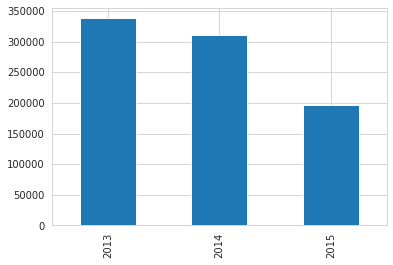

In [61]:
ROSS2['year'].value_counts().plot(kind='bar')

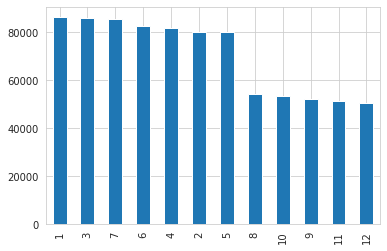

In [62]:
ROSS2['month'].value_counts().plot(kind='bar'),

**Continous** **Data** **Visualisation**

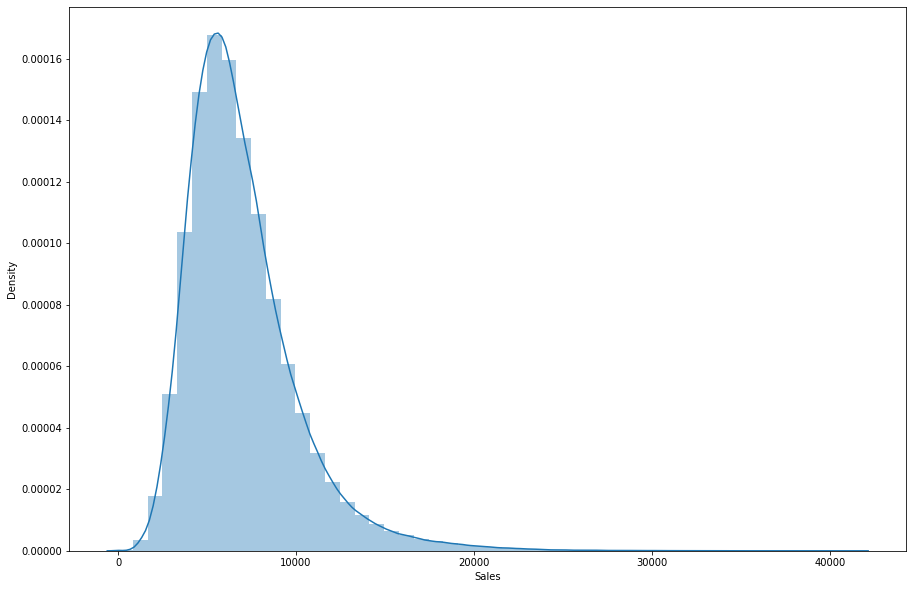

In [29]:
#Sales
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['Sales'])

Sales distribution which is the target or dependent variable  seems to be positively skewed. Positively skewed can be explained as distribution more piled towards the left and median usually lesser than mean. 

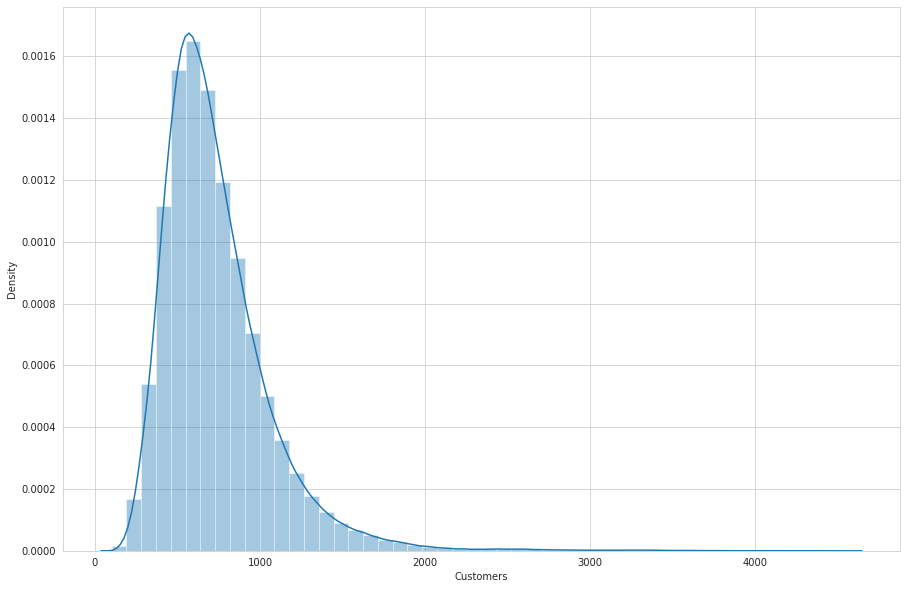

In [23]:
#Customers
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['Customers'])

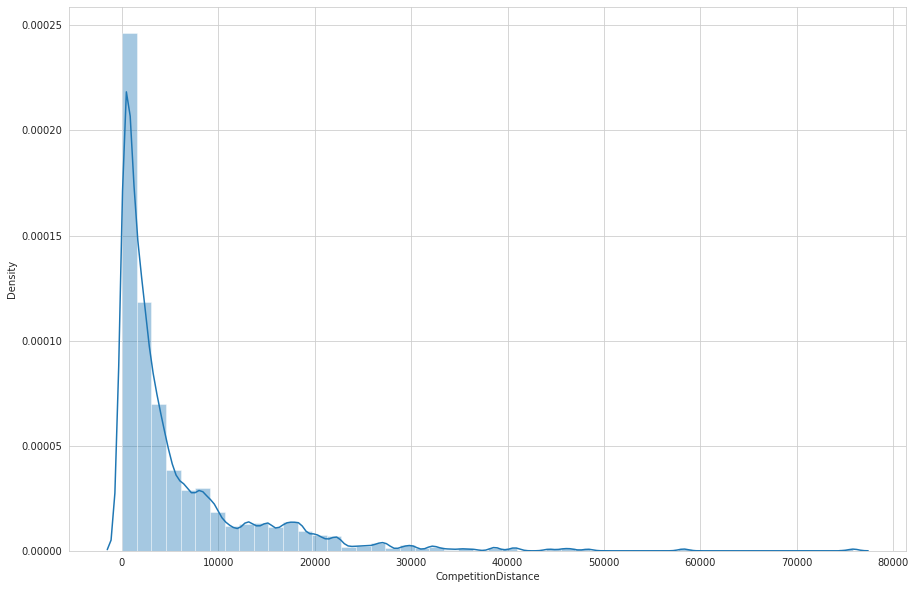

In [26]:
#CompetitionDistance
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['CompetitionDistance'])

**Sales vs Other Features**

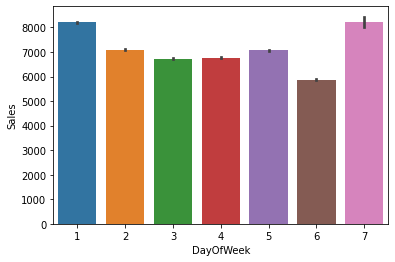

In [30]:
# Sales vs Other variable
#Sales vs Dayofweek
sns.barplot(x="DayOfWeek", y="Sales", data=ROSS2)
plt.show()

We can see that weekends have higher sale than weekdays.

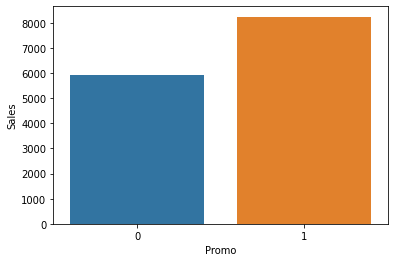

In [31]:
sns.barplot(x="Promo", y="Sales", data=ROSS2)
plt.show()

Sales is better with promotion.

In [32]:
ROSS2.loc[ROSS2['StateHoliday'] == '0', 'StateHoliday'] = 0
ROSS2.loc[ROSS2['StateHoliday'] == 'a', 'StateHoliday'] = 1
ROSS2.loc[ROSS2['StateHoliday'] == 'b', 'StateHoliday'] = 2
ROSS2.loc[ROSS2['StateHoliday'] == 'c', 'StateHoliday'] = 3
ROSS2['StateHoliday'] = ROSS2['StateHoliday'].astype(int, copy=False)

print('levels :', ROSS2['StateHoliday'].unique(), '; data type :', ROSS2['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


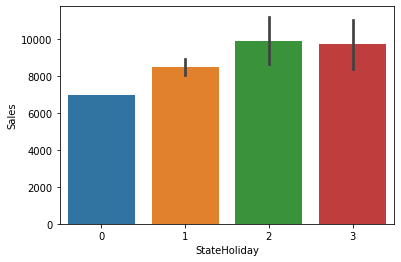

In [33]:
sns.barplot(x="StateHoliday", y="Sales", data=ROSS2)


:1 = public holiday, 2 = Easter holiday, 3 = Christmas, 0 = None.
Sales perform well on State holidays especially easter and christmas holidays.

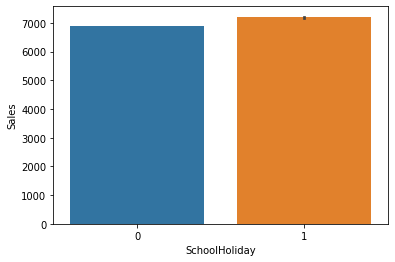

In [34]:
sns.barplot(x="SchoolHoliday", y="Sales", data=ROSS2)


sales perform better on school holidays.

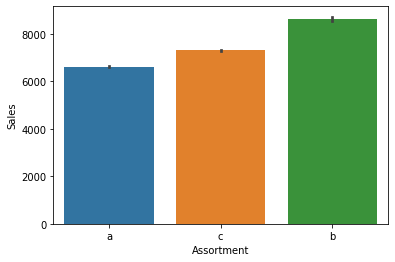

In [35]:
sns.barplot(x="Assortment", y="Sales", data=ROSS2)

Type b assortment performs better in terms of sales, followed by type c assortments.

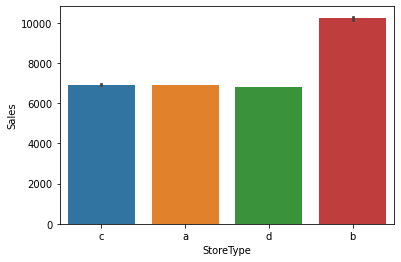

In [36]:
sns.barplot(x="StoreType", y="Sales", data=ROSS2)

In [37]:
print(ROSS2[ROSS2['StoreType'] == 'a']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'b']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'c']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'd']['Sales'].mean())

6925.167661028667
10231.40750497976
6932.512754695605
6822.1418805598705


**Storetype B performs better** than all other store types.

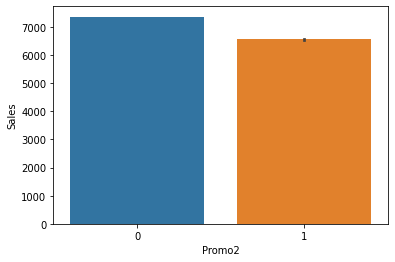

In [38]:
sns.barplot(x="Promo2", y="Sales", data=ROSS2)
plt.show()

Stores not participating in continous promotion perform better when compared to stores with contionous promotion.

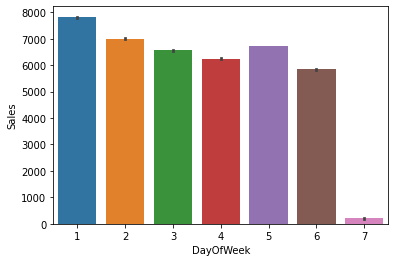

In [39]:
sns.barplot(x="DayOfWeek", y="Sales", data=ROSS)

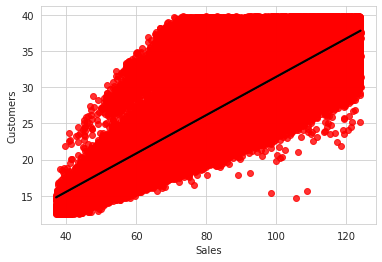

In [31]:
#Sales vs No of customers Correlation
sns.regplot(x=ROSS2['Sales'], y=ROSS2['Customers'],scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [53]:
ROSS['Customers'].corr(ROSS['Sales'])

0.8947107733017032

No of customers and amount of sales is highly correlated with R value of 0.82

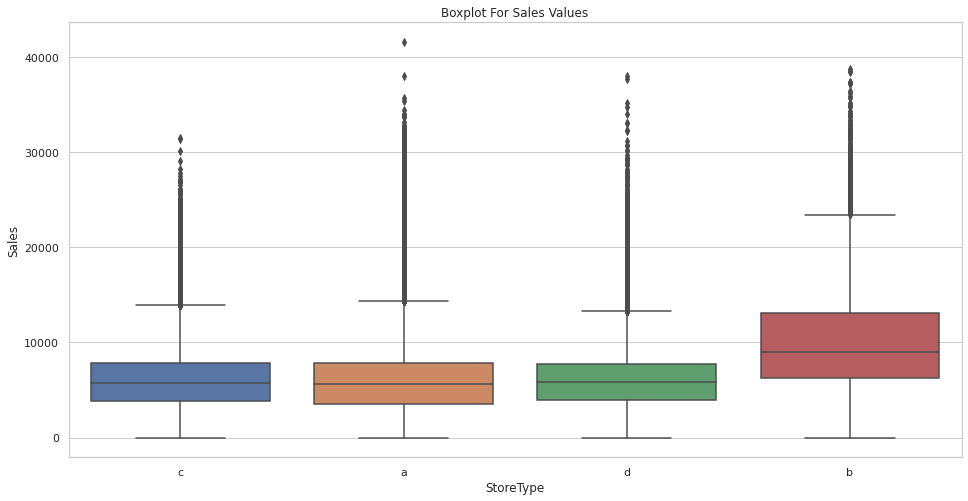

In [82]:
plt.figure(figsize=(16, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=ROSS)
plt.title('Boxplot For Sales Values')
plt.show()

Outliers need to be handled.

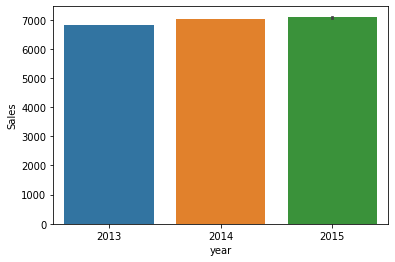

In [41]:
#Average sales each year
sns.barplot(x="year", y="Sales", data=ROSS2)

In [42]:
print(ROSS2[ROSS2['year'] == 2013]['Sales'].mean())
print(ROSS2[ROSS2['year'] == 2014]['Sales'].mean())
print(ROSS2[ROSS2['year'] == 2015]['Sales'].mean())

6814.3920246905545
7025.4042014451525
7088.126647690173


We can see avaerage sales is increasing each year.

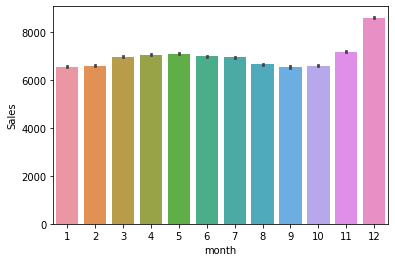

In [43]:
#Average sales based on month
sns.barplot(x="month", y="Sales", data=ROSS2)

November and December have the highest average sales.

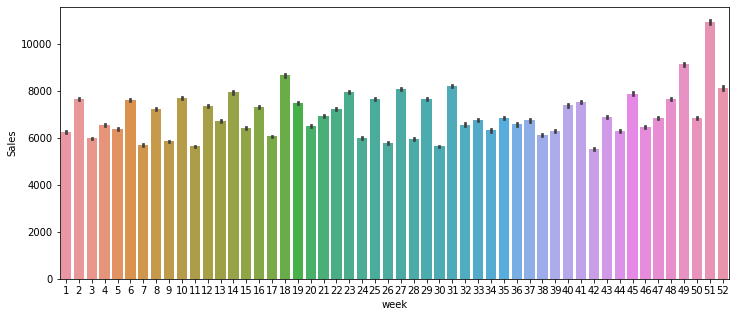

In [46]:
#Average sales based on week
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="week", y="Sales", data=ROSS2,ax=ax)

We can clearly see the spike in sales during the christmas time i.e the 51st week.

FEATURE PREDICTION MODEL.


In [47]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score

In [48]:
# code for changing Assortment dtype from object to int.
ROSS2.loc[ROSS2['Assortment'] == 'a', 'Assortment'] = 1
ROSS2.loc[ROSS2['Assortment'] == 'b', 'Assortment'] = 2
ROSS2.loc[ROSS2['Assortment'] == 'c', 'Assortment'] = 3
ROSS2['Assortment'] = ROSS2['Assortment'].astype(int, copy=False)

print('levels :', ROSS2['Assortment'].unique(), '; data type :', ROSS2['Assortment'].dtype)

levels : [1 3 2] ; data type : int64


In [49]:
# code for changing StoreType dtype from object to int.
ROSS2.loc[ROSS2['StoreType'] == 'a', 'StoreType'] = 0
ROSS2.loc[ROSS2['StoreType'] == 'b', 'StoreType'] = 1
ROSS2.loc[ROSS2['StoreType'] == 'c', 'StoreType'] = 2
ROSS2.loc[ROSS2['StoreType'] == 'd', 'StoreType'] = 3
ROSS2['StoreType'] = ROSS2['StoreType'].astype(int, copy=False)

print('levels :', ROSS2['StoreType'].unique(), '; data type :', ROSS2['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [35]:
ROSS2['CompetitionOpenSinceYear']= ROSS2['CompetitionOpenSinceYear'].astype(int)
ROSS2['Promo2SinceYear']= ROSS2['Promo2SinceYear'].astype(int)

In [36]:
ROSS2['Promo2SinceWeek']= ROSS2['Promo2SinceWeek'].astype(int)

(15.5, -0.5)

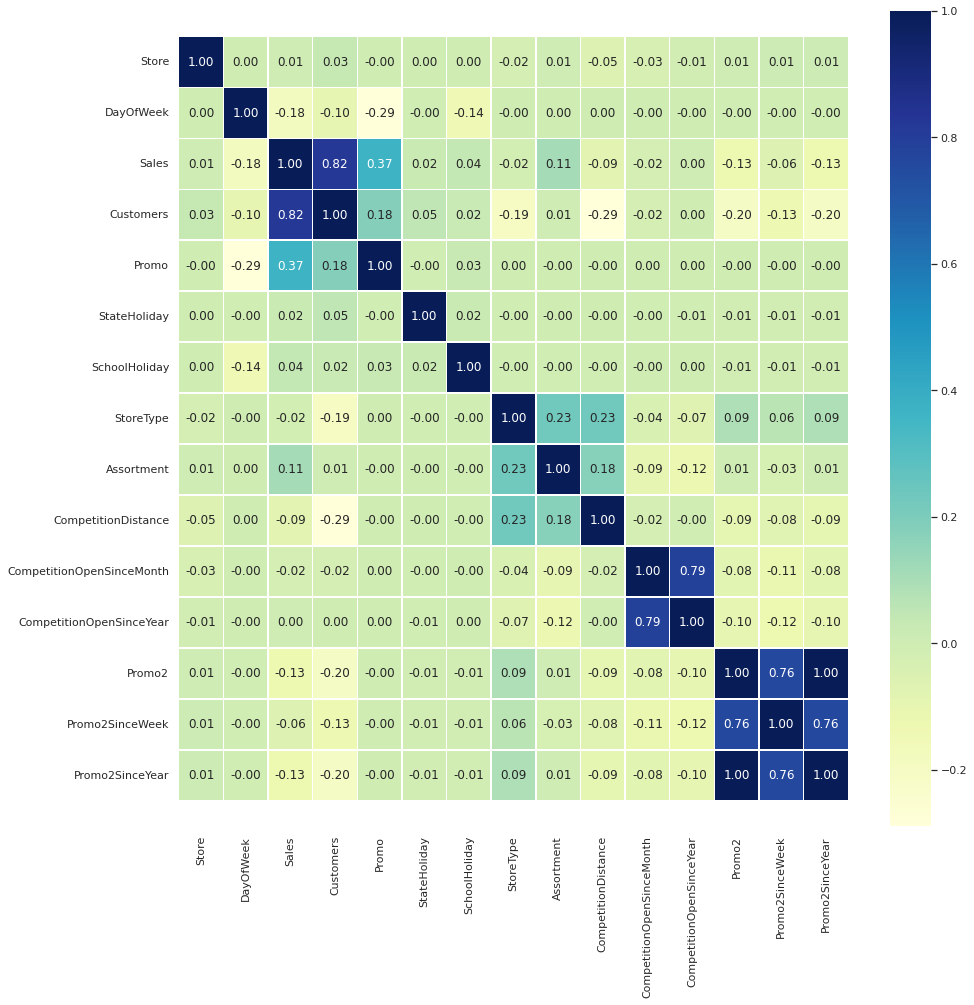

In [103]:
corr_matrix = ROSS2.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

High multicollinearity between promo2,promo2sinceweek and promo2sinceyear.
So we need to remove  2 among  the 3. We can drop promo2sinceweek and promo2sinceyear. Same with competionopensincemonth and competitionopensinceyear,we competionsinceyear.

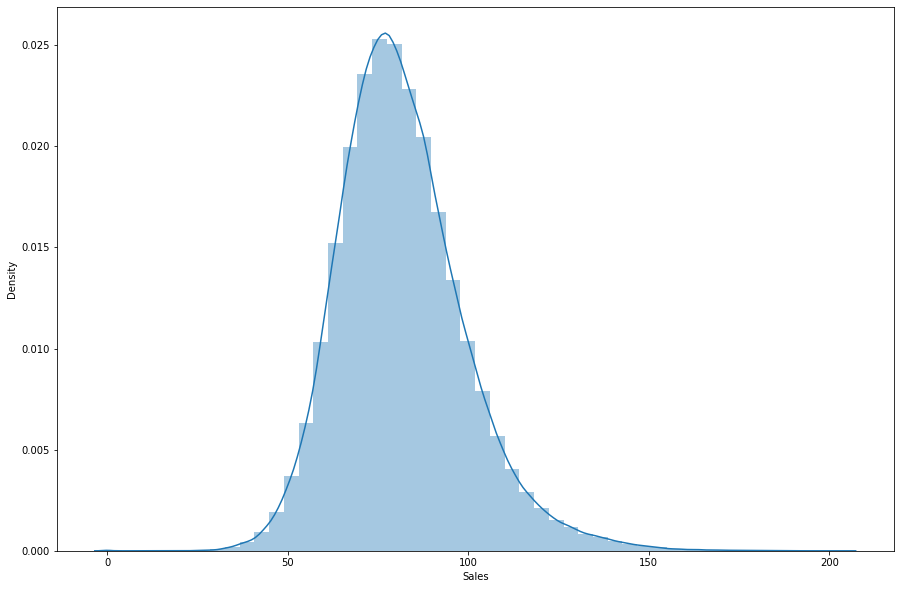

In [19]:
#Applying transformation to reduce skewness 
ROSS2['Sales']=np.sqrt(ROSS2['Sales'])
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['Sales'])

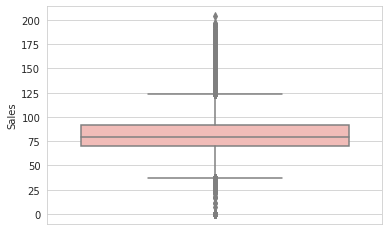

In [20]:
#checking for outliers
sns.set_style('whitegrid')
sns.boxplot(y=ROSS2['Sales'], palette='Pastel1');
plt.show()

In [21]:
#Removing outliers
percentile_25 = np.percentile(ROSS2['Sales'],25)
percentile_75 = np.percentile(ROSS2['Sales'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
ROSS2.drop(index=ROSS2[ROSS2['Sales']>upper_outlier_bound].index,axis=0,inplace=True)
ROSS2.drop(index=ROSS2[ROSS2['Sales']<lower_outlier_bound].index,axis=0,inplace=True)

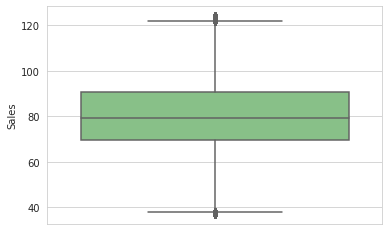

In [22]:
sns.boxplot(y=ROSS2['Sales'], palette='Accent');
plt.show()

Postively skewed customers data.

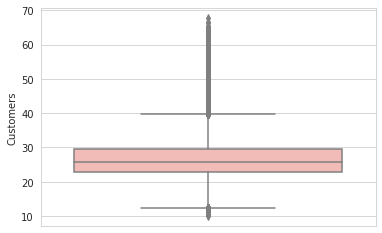

In [24]:
#Applying transformation to reduce skewness 
ROSS2['Customers']=np.sqrt(ROSS2['Customers'])
#checking outliers
sns.set_style('whitegrid')
sns.boxplot(y=ROSS2['Customers'], palette='Pastel1');
plt.show()

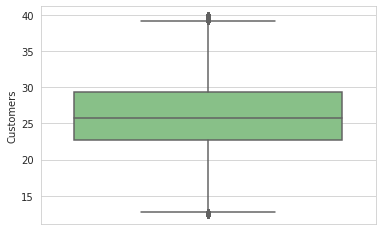

In [25]:
percentile_25 = np.percentile(ROSS2['Customers'],25)
percentile_75 = np.percentile(ROSS2['Customers'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
ROSS2.drop(index=ROSS2[ROSS2['Customers']>upper_outlier_bound].index,axis=0,inplace=True)
ROSS2.drop(index=ROSS2[ROSS2['Customers']<lower_outlier_bound].index,axis=0,inplace=True)
sns.set_style('whitegrid')
sns.boxplot(y=ROSS2['Customers'], palette='Accent');
plt.show()


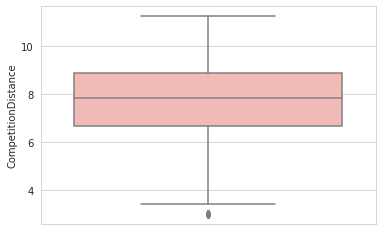

In [27]:
#Applying transformation to reduce skewness 
ROSS2['CompetitionDistance']=np.log(ROSS2['CompetitionDistance'])
#checking outliers
sns.set_style('whitegrid')
sns.boxplot(y=ROSS2['CompetitionDistance'], palette='Pastel1');
plt.show()

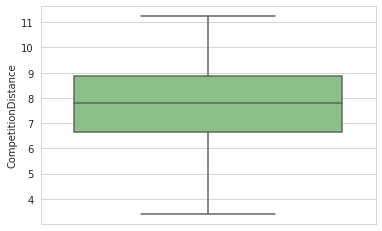

In [28]:
percentile_25 = np.percentile(ROSS2['CompetitionDistance'],25)
percentile_75 = np.percentile(ROSS2['CompetitionDistance'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
ROSS2.drop(index=ROSS2[ROSS2['CompetitionDistance']>upper_outlier_bound].index,axis=0,inplace=True)
ROSS2.drop(index=ROSS2[ROSS2['CompetitionDistance']<lower_outlier_bound].index,axis=0,inplace=True)
sns.set_style('whitegrid')
sns.boxplot(y=ROSS2['CompetitionDistance'], palette='Accent');
plt.show()

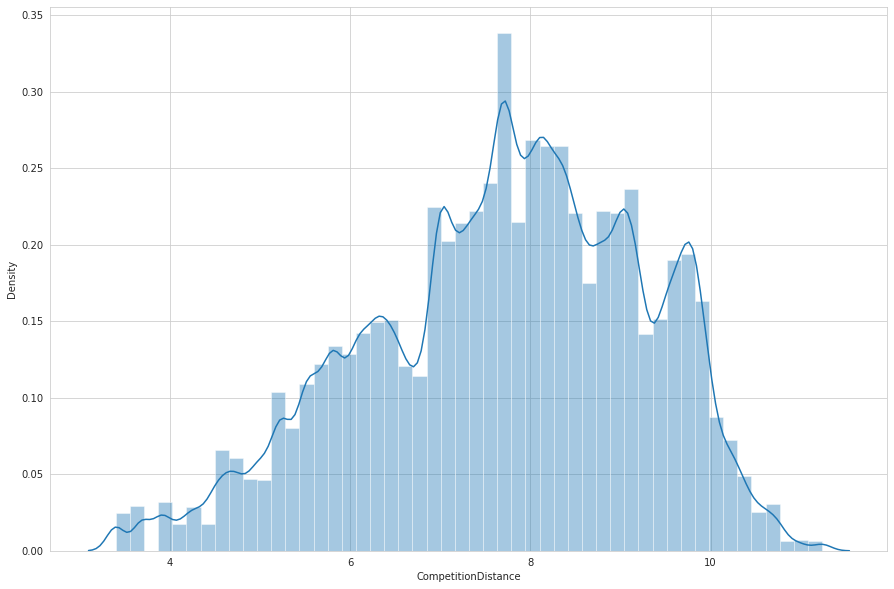

In [29]:
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['CompetitionDistance'])

As mentioned earlier storetype B performs better based on sales numbers.

In [30]:
ROSS2['Date']=pd.to_datetime(ROSS2['Date'])

In [31]:
#To convert date in year,month and week
ROSS2['Date'].dtypes
ROSS2['year']=ROSS2['Date'].dt.year
ROSS2['month']=ROSS2['Date'].dt.month
ROSS2['week']=ROSS2['Date'].dt.week

In [32]:
#Deleting the date column
del ROSS2['Date']

Sales based on year

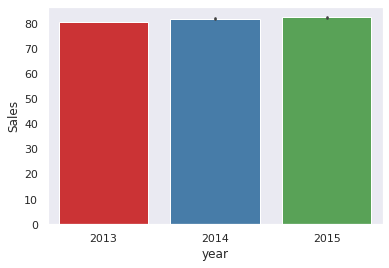

In [69]:
sns.set_theme(style='dark')
ax=sns.barplot(x='year',y='Sales',data=ROSS2, palette='Set1')

Sales based on month

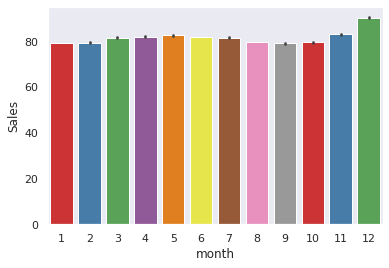

In [70]:
sns.set_theme(style='dark')
ax=sns.barplot(x='month',y='Sales',data=ROSS2, palette='Set1')

## Feature selection for Regression Model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f95f2d10>,
      dtype=object)

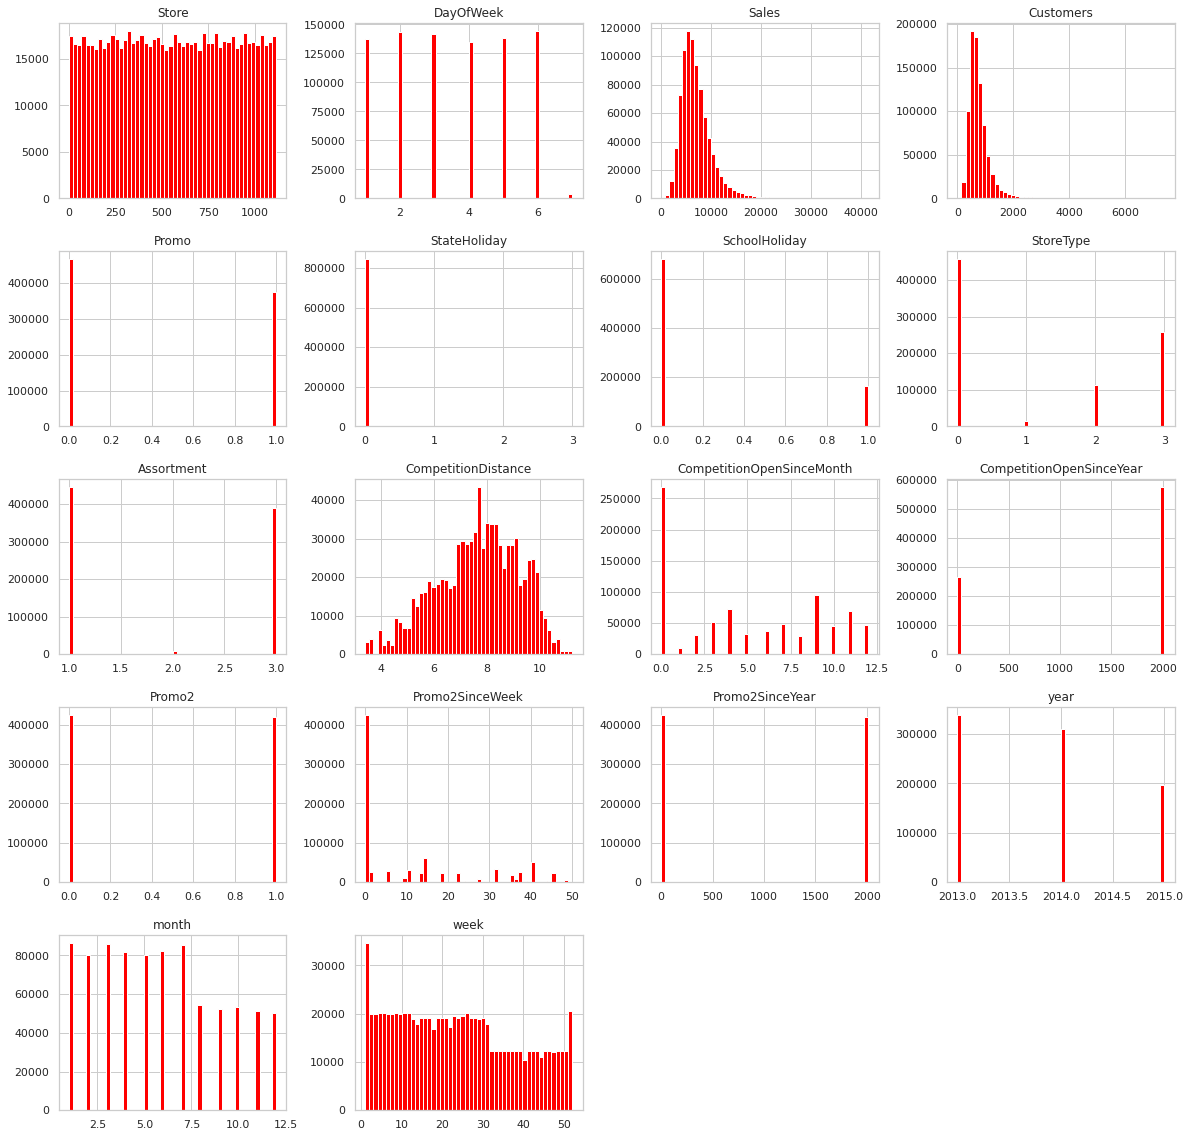

In [108]:
ROSS2.hist(figsize = (20,20),bins=50,color='red')

In [65]:
ROSS2.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,week
0,1,5,72.546537,555,1,0,1,2,1,7,9.0,2008,0,0,0,0,2015,7,31
1,2,5,77.871689,625,1,0,1,0,1,6,11.0,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,91.181138,821,1,0,1,0,1,9,12.0,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,118.300465,1498,1,0,1,2,3,6,9.0,2009,0,0,0,0,2015,7,31
4,5,5,69.440622,559,1,0,1,0,1,10,4.0,2015,0,0,0,0,2015,7,31


In [33]:
ROSS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807102 entries, 0 to 1017190
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      807102 non-null  int64  
 1   DayOfWeek                  807102 non-null  int64  
 2   Sales                      807102 non-null  float64
 3   Customers                  807102 non-null  float64
 4   Promo                      807102 non-null  int64  
 5   StateHoliday               807102 non-null  object 
 6   SchoolHoliday              807102 non-null  int64  
 7   StoreType                  807102 non-null  object 
 8   Assortment                 807102 non-null  object 
 9   CompetitionDistance        807102 non-null  float64
 10  CompetitionOpenSinceMonth  807102 non-null  float64
 11  CompetitionOpenSinceYear   807102 non-null  float64
 12  Promo2                     807102 non-null  int64  
 13  Promo2SinceWeek            8

We need not include 'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear' due to multicollinearity. We need not include 'StateHoliday' as the data distribution between categories is almost even.

In [ ]:
ROSS2.drop(['CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','Date'], axis = 1, inplace = True)

In [ ]:
ROSS3= pd.get_dummies(ROSS2,columns=['PromoInterval','DayOfWeek','StateHoliday','StoreType','Assortment'])

In [ ]:
ROSS3.head()

,Store,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov",...,StateHoliday_1,StateHoliday_2,StateHoliday_3,StoreType_0,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2,Assortment_3
0,1,5263,555,1,1,1270,9.0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,2,6064,625,1,1,570,11.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3,8314,821,1,1,14130,12.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,13995,1498,1,1,620,9.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,5,4822,559,1,1,29910,4.0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
ROSS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           844392 non-null  int64  
 1   Date                            844392 non-null  object 
 2   Sales                           844392 non-null  int64  
 3   Customers                       844392 non-null  int64  
 4   Promo                           844392 non-null  int64  
 5   SchoolHoliday                   844392 non-null  int64  
 6   CompetitionDistance             844392 non-null  int64  
 7   CompetitionOpenSinceMonth       844392 non-null  float64
 8   Promo2                          844392 non-null  int64  
 9   PromoInterval_0                 844392 non-null  uint8  
 10  PromoInterval_Feb,May,Aug,Nov   844392 non-null  uint8  
 11  PromoInterval_Jan,Apr,Jul,Oct   844392 non-null  uint8  
 12  PromoInterval_M

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#preprocessing data
X_data = ROSS3.drop(columns=['Sales']).copy()
y_data = ROSS3[['Sales']].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)

In [ ]:
# Scale the data
scaler = StandardScaler() 
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)
y_train_sc=scaler.fit_transform(y_train)
y_test_sc=scaler.transform(y_test)

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['CatBoost:', CatBoostRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()]]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train_sc,y_train_sc)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train_sc,curr_model.predict(X_train_sc))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test_sc,curr_model.predict(X_test_sc))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test_sc,curr_model.predict(X_test_sc)))
    model_data.append(curr_model_data)

NameError: ignored

In [ ]:
['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],

Model 1

In [ ]:
# define dependent variable
DV = 'Sales'

# defining independent variable
IV = list(ROSS3.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
IV


['Store',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_1',
 'StateHoliday_2',
 'StateHoliday_3',
 'StoreType_0',
 'StoreType_1',
 'StoreType_2',
 'StoreType_3',
 'Assortment_1',
 'Assortment_2',
 'Assortment_3']

In [ ]:
# Creation of independent variables
x = ROSS3[IV].values

# Creation of dependent variable
y = ROSS3[DV].values

In [ ]:
# splitting train & test dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 0)
print(xtrain.shape)
print(xtest.shape)

(591074, 31)
(253318, 31)


**Linear Regression**

In [ ]:
LR = LinearRegression().fit(xtrain, ytrain)

In [ ]:
LR.score(xtrain, ytrain)

0.8300404968461588

In [ ]:
LR.score(xtest, ytest)

0.8299474800791719

In [ ]:
# Predicting the Test set results
LRtestpred = LR.predict(xtest)

In [ ]:
# Predicting Train
LRtrainpred = LR.predict(xtrain)

In [ ]:
MSE=mse(ytest,LRtestpred)
MSE

1629004.7015139114

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

1276.324684989643

In [ ]:
LR.coef_

array([-1.15505401e-01,  7.33586707e+00,  1.27938577e+03,  1.33610193e+02,
        2.48857631e-02, -4.94516515e+00,  6.21226131e-02,  2.43705777e+01,
        8.71010821e+00, -2.43705777e+01,  4.05505580e+01,  1.13102717e+02,
       -1.29282697e+02,  3.67320732e+02, -1.02481231e+02, -2.46685136e+02,
       -3.35581550e+02, -1.84619524e+02,  1.98664379e+02,  3.03382330e+02,
       -7.39362424e+02, -5.47242897e+02, -1.12934949e+03,  2.41595481e+03,
        5.59757777e+02, -2.69665030e+03,  4.45810104e+02,  1.69108242e+03,
        1.22952030e+03, -2.79883487e+03,  1.56931457e+03])

In [ ]:
LR = LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
from scipy import stats
LRres=LR.fit(x,y)
sns.distplot(LRres.resid, fit=stats.norm);

AttributeError: ignored

LASSO

In [ ]:
L1 = Lasso(alpha = 0.2, max_iter=10000)

In [ ]:
L1.fit(xtrain, ytrain)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
yPredLasso = L1.predict(xtest)

In [ ]:
L1.score(xtest, ytest)

0.8299522574540386

In [ ]:
pd.DataFrame(zip(ytest, yPredLasso), columns = ['actual', 'pred'])

,actual,pred
0,5495,5755.214363
1,5472,4940.948358
2,7969,7179.190606
3,7384,6783.960520
4,13212,8670.687779
...,...,...
253313,8528,9873.942640
253314,5671,5797.045841
253315,9214,9896.369834
253316,9035,8265.679074


RIDGE

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(xtrain, ytrain)

Ridge(alpha=0.5)

In [ ]:
L2.predict(xtest)

array([5758.1868486 , 4938.8061261 , 7177.54752837, ..., 9902.46312507,
       8270.96285534, 2807.96358235])

In [ ]:
L2.score(xtest, ytest)

0.8299478763142543

DECISION TREE

In [ ]:
sales_mean=ROSS3['Sales'].mean()

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(xtrain, ytrain)
y_pred_dt = decision_tree.predict(xtest)
y_train_dt = decision_tree.predict(xtrain)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mse(ytest, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(ytest, y_pred_dt)
print("R2 :" ,r2)

MSE : 1926742.9565548762
RMSE : 1388.0716683784292
RMPSE : 0.19956420335778913
R2 : 0.7988664521978573
